# Title
As a Manchester United supporter

For this analysis, I am using data from the Open Football project, which provides open public domain football data in CSV format (https://footballcsv.github.io/) for download. The Open Football project provides data from many leagues across the world, however, I will be focusing on the top division of English football for which data is provided between most of the years between 1888 to 2020.

This project focuses on answering the following:
- Does Manchester United live up to their reputation as comeback kings?
- How successful was the Sir Alex Ferguson era of Manchester United (1992-2012) compared to other historically great English eras like 70's Liverpool, 50's Everton


# A. Preparing the dataset

There are a number of wrinkles with the data that will require some adjustments before we can begin the analysis proper.

## Accessing the desired dataset(s)
Firstly, the download provides CSV files for each available season in separate folders - by decade, season, and then finally CSV files for each division. 

For example, the path to the CSV file containing results from the 2019-20 season of the English Premier League (the top division of English football) is:

> */path to folder/England-master/2010s/2019-20/eng.1.csv*

For flexibility, we want to be able to access any individual season for which there is data, as well as the ability to merge them into a single dataset.

For this purpose, we have a function that populates a dictionary with the correct paths for each CSV:

In [147]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

#This creates a dictionary with paths to each season's CSV file. You can modify the number of seasons by decade.
def seasons_dictionary(starting_decade, ending_decade):
    eng = 'D:\Google Drive\\New Dropbox\Work stuff\Professional Development\Data Projects\Football_python\england-master'
    seasons = {}
    for i in range(int(abs((starting_decade - ending_decade)/10)) + 1):
        decade = starting_decade
        decade_string = str(decade) + 's'
        list_of_seasons = []
        for i in range(10):
            season = str(decade + i) + '-' + str(decade + i + 1)[2:4]
            list_of_seasons.append(season)
            seasons[decade_string] = list_of_seasons
        starting_decade += 10
    df_dictionary = {}
    for decade in seasons:
        for season in seasons[decade]:
            path = eng + '\\' + decade + '\\' + season + '\eng.1.csv'
            df_name = 'df_eng_' + season
            df_dictionary[df_name] = path
    return df_dictionary

#To return the paths for every season in the 2010s:
seasons_dictionary(2010, 2010)

{'df_eng_2010-11': 'D:\\Google Drive\\New Dropbox\\Work stuff\\Professional Development\\Data Projects\\Football_python\\england-master\\2010s\\2010-11\\eng.1.csv',
 'df_eng_2011-12': 'D:\\Google Drive\\New Dropbox\\Work stuff\\Professional Development\\Data Projects\\Football_python\\england-master\\2010s\\2011-12\\eng.1.csv',
 'df_eng_2012-13': 'D:\\Google Drive\\New Dropbox\\Work stuff\\Professional Development\\Data Projects\\Football_python\\england-master\\2010s\\2012-13\\eng.1.csv',
 'df_eng_2013-14': 'D:\\Google Drive\\New Dropbox\\Work stuff\\Professional Development\\Data Projects\\Football_python\\england-master\\2010s\\2013-14\\eng.1.csv',
 'df_eng_2014-15': 'D:\\Google Drive\\New Dropbox\\Work stuff\\Professional Development\\Data Projects\\Football_python\\england-master\\2010s\\2014-15\\eng.1.csv',
 'df_eng_2015-16': 'D:\\Google Drive\\New Dropbox\\Work stuff\\Professional Development\\Data Projects\\Football_python\\england-master\\2010s\\2015-16\\eng.1.csv',
 'df_eng_2

Using the dictionary produced by this function, we can then specify any individual season (CSV file) to read in to a pandas dataframe.

In [148]:
#Creates a data frame from the CSV file of the specified season
def create_df(season):
    all_seasons = seasons_dictionary(1880, 2010)
    all_seasons['df_eng_' + season]
    df = pd.read_csv(all_seasons['df_eng_' + season])
    return df

#For example, here's a snapshot of the 2014-15 Premier League season:
EPL_14_15 = create_df('2014-15')
EPL_14_15.head(3)

,Round,Date,Team 1,FT,HT,Team 2
0,?,(Sat) 16 Aug 2014 (W33),Arsenal FC (1),2-1,1-1,Crystal Palace FC (1)
1,?,(Sat) 16 Aug 2014 (W33),Leicester City FC (1),2-2,1-2,Everton FC (1)
2,?,(Sat) 16 Aug 2014 (W33),Manchester United FC (1),1-2,0-1,Swansea City AFC (1)


We also want to be able to look at more than a single season, even though the data is contained in separate CSV files. Building on the seasons_dictionary() function again, we can read in and merge the CSV files for multiple seasons. Note that not every year has data. There were interruptions to professional football, most notably during the years of the World Wars. The function has accommodated for this with error handling.

Here, we use the merge_df() function below to create a data frame containing *all* the available data for top flight English football, from the 1888-89 seasons to the 2019-20 season.

In [149]:
#Finally, this function reads in any number of season datasets as specified in the argument, and merges them into a single dataframe
def merge_df(start_season, end_season):
    df_dictionary = seasons_dictionary(1880, 2010)
    df_list = []
    seasons_list = []
    #Identify the index of the starting season and ending season specified
    start_index = list(df_dictionary.keys()).index('df_eng_' + start_season)
    end_index = (list(df_dictionary.keys()).index('df_eng_' + end_season)) + 1
    #Iterate through these indices to populate the seasons_list with the desired keys for seasons_dictionary
    for i in range(start_index, end_index):
        season_key = list(df_dictionary.keys())[i]
        seasons_list.append(season_key)
    #Use the keys in seasons_list to fetch the paths to each season, and reading them in to a list of dfs in df_list
    for i in df_dictionary:
        if i in seasons_list:
            try:
                df = pd.read_csv(df_dictionary[i], index_col=None, header=0)
                #While we're at it, use regex to isolate the season for each CSV file, and add it as a column to the dataframe before appending it to df_list
                season = re.findall(r'\d\d\d\d-\d\d', i)[0]
                df['Season'] = season
                df_list.append(df)
            except FileNotFoundError: #This exception accommodates the fact that data is not available for all years - for example, seasons that were not played due to WW1 and WW2.
                continue
    #Finally, merge the dfs in df_list into a single df
    merged_df = pd.concat(df_list, axis =0, ignore_index=True)
    return merged_df

#Let's make use of all the available data, from the 1888-89 season to the current 2019-20 season.
merged_df = merge_df('1888-89', '2019-20')
merged_df

,Round,Date,Team 1,FT,HT,Team 2,Season
0,?,(Sat) 8 Sep 1888 (36),Bolton Wanderers FC (1),3-6,?,Derby County FC (1),1888-89
1,?,(Sat) 8 Sep 1888 (36),Wolverhampton Wanderers FC (1),1-1,?,Aston Villa FC (1),1888-89
2,?,(Sat) 8 Sep 1888 (36),Preston North End FC (1),5-2,?,Burnley FC (1),1888-89
3,?,(Sat) 8 Sep 1888 (36),Everton FC (1),2-1,?,Accrington FC (1878-1896) (1),1888-89
4,?,(Sat) 8 Sep 1888 (36),Stoke City FC (1),0-2,?,West Bromwich Albion FC (1),1888-89
...,...,...,...,...,...,...,...
48986,?,(Sat) 7 Mar 2020 (W10),Wolverhampton Wanderers FC (29),0-0,0-0,Brighton & Hove Albion FC (29),2019-20
48987,?,(Sat) 7 Mar 2020 (W10),Burnley FC (29),1-1,1-0,Tottenham Hotspur FC (29),2019-20
48988,?,(Sun) 8 Mar 2020 (W10),Chelsea FC (29),4-0,2-0,Everton FC (29),2019-20
48989,?,(Sun) 8 Mar 2020 (W10),Manchester United FC (29),2-0,1-0,Manchester City FC (28),2019-20


As we can see, the merged dataset starts on the 8th September 1888 and it ends 48,991 games and 132 years later, with a game on 9th March 2020.

## Cleaning and enhancing the dataset

Now that we have the desired dataset, there is some cleaning to do:

- The dataset has missing data in the "Round" and "HT" columns. They are marked by the '?' symbol.
- The FT (full time) and HT (half time) scores are represented as strings, not numbers
- We must infer the goals scored by the home and away teams by the order of the string. '4-0' means the home team scored 4 goals to the away team scored 0 goals.

It would be nice (and much more useful) to be able to deal with these scores as numbers, and to have the goals explicitly attributed to the home or away teams.

To clean and enhance the dataset, we will need to:
- Get rid of the "Round" column - the vast majority of seasons have missing data for this column, and it is useless for our analysis.
- Add some columns which provide ways for us to cut the data, such as the number of goals scored by the home vs. away teams, the total number of goals scored, as well as goals scored in the first half vs. the second half.
- Find a way to handle the missing half-time scores when it comes to statistics which rely on that information.

In [150]:
#Let's make some changes to the dataset to better suit our purposes.
def add_columns(dataframe):
    df = dataframe
    #df['HT'].loc[df['HT'] == '?'] = np.NaN #Because there thousands of rows without HT score data (marked as '?'), this line converts these all to missing data ("NaN")
    #This converts a string '2-1' to a list [2,1] for the FT and HT columns
    FT_score_list = df['FT'].map(lambda FT: re.findall(r'\d+', FT)) 
    HT_score_list = df['HT'].map(lambda HT: re.findall(r'\d+', HT))
    #Now that we have the scores in a list format, we can convert them to integers and play with them to create the following additional statistics:
    df['Total goals'] = FT_score_list.map(lambda goals: int(goals[0]) + int(goals[1]))
    df['Home goals'] = FT_score_list.map(lambda goals: int(goals[0]))
    df['Away goals'] = FT_score_list.map(lambda goals: int(goals[1])) 
    df['First half goals'] = HT_score_list.map(lambda goals: int(goals[0]) + int(goals[1]) if goals != [] else np.NaN) #NOTE:the if condition is necessary because for many games the HT result is missing. They are marked as NaN if so.
    df['Second half goals'] = df['Total goals'] - df['First half goals']
    #Finally, delete the useless "round" column
    df = df.drop(columns=['Round'])
    return df

merged_df = add_columns(merged_df)
merged_df

,Date,Team 1,FT,HT,Team 2,Season,Total goals,Home goals,Away goals,First half goals,Second half goals
0,(Sat) 8 Sep 1888 (36),Bolton Wanderers FC (1),3-6,?,Derby County FC (1),1888-89,9,3,6,NaN,NaN
1,(Sat) 8 Sep 1888 (36),Wolverhampton Wanderers FC (1),1-1,?,Aston Villa FC (1),1888-89,2,1,1,NaN,NaN
2,(Sat) 8 Sep 1888 (36),Preston North End FC (1),5-2,?,Burnley FC (1),1888-89,7,5,2,NaN,NaN
3,(Sat) 8 Sep 1888 (36),Everton FC (1),2-1,?,Accrington FC (1878-1896) (1),1888-89,3,2,1,NaN,NaN
4,(Sat) 8 Sep 1888 (36),Stoke City FC (1),0-2,?,West Bromwich Albion FC (1),1888-89,2,0,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48986,(Sat) 7 Mar 2020 (W10),Wolverhampton Wanderers FC (29),0-0,0-0,Brighton & Hove Albion FC (29),2019-20,0,0,0,0.0,0.0
48987,(Sat) 7 Mar 2020 (W10),Burnley FC (29),1-1,1-0,Tottenham Hotspur FC (29),2019-20,2,1,1,1.0,1.0
48988,(Sun) 8 Mar 2020 (W10),Chelsea FC (29),4-0,2-0,Everton FC (29),2019-20,4,4,0,2.0,2.0
48989,(Sun) 8 Mar 2020 (W10),Manchester United FC (29),2-0,1-0,Manchester City FC (28),2019-20,2,2,0,1.0,1.0


# B. Initial Analysis of Historical Dataset

With a large historical dataset and some additional columns of information, we can now begin exploring the data at a high level. Here, we will check for statistical trends by visualising the data using the matplotlib library.
- Are there any discernable trends in terms of goals scored - were teams in the olden days more or less prolific?
- Were teams more or less dominant? Was the gap between winners and losers bigger or smaller?
- What was the most common result, and how has that changed over time?
- Has 'home' advantage increased over time?

Let's begin exploring the first question by looking at the number of goals scored over time.

## Goals scored over time

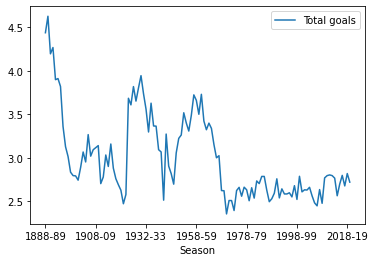

In [151]:
df = add_columns(merge_df('1888-89', '2019-20'))
df.groupby(['Season']).agg({'Total goals': 'mean'}).plot.line()
plt.show()

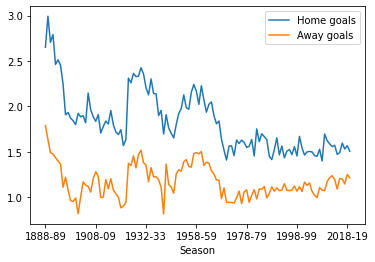

In [152]:
df = add_columns(merge_df('1888-89', '2019-20'))
df.groupby(['Season']).agg({'Home goals': 'mean', 'Away goals': 'mean'}).plot.line()
plt.show()

Text(0, 0.5, 'Season')

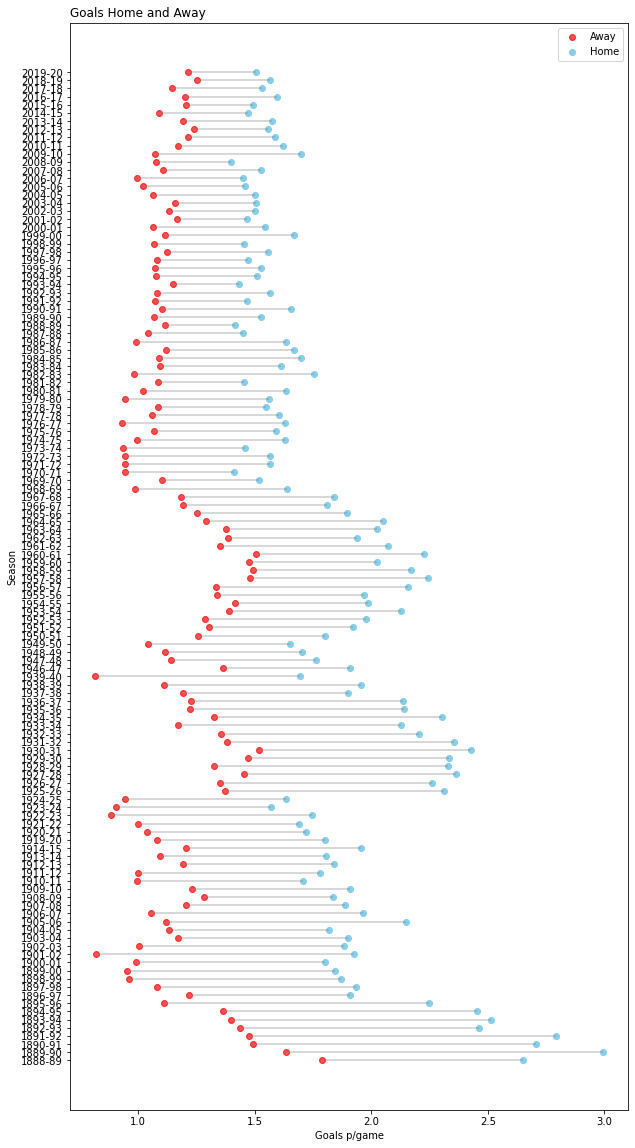

In [153]:
df = add_columns(merge_df('1888-89', '2019-20'))
df = df.groupby(['Season'], as_index = False).agg({'Away goals': 'mean', 'Home goals': 'mean'})
season = df['Season']

plt.figure(figsize = (10,20))
plt.hlines(y = season, xmin = df['Away goals'], xmax = df['Home goals'], color='grey', alpha=0.4)
plt.scatter(df['Away goals'], season, color = 'red', alpha = 0.7, label = 'Away')
plt.scatter(df['Home goals'], season, color = 'skyblue', alpha = 1, label = 'Home')
plt.legend()

plt.yticks(season, df['Season'])
plt.title('Goals Home and Away', loc = 'left')
plt.xlabel('Goals p/game')
plt.ylabel('Season')

## Filtering the data

Again, it would be useful to have some way to quickly isolate certain information to make this exploration easier. It would be great if we could:
- Look up a particular team's fixtures
- Look up particular matchups between two teams
- Get some descriptive statistics about those filtered results, such as average number of goals scored

In [154]:
#Look up a particular team's fixtures
def find_team_games(df, name):
    games = df.loc[(df['Team 1'].str.contains(name, re.compile('(\d)|(\d\d)')) == True) | (df['Team 2'].str.contains(name, re.compile('(\d)|(\d\d)')) == True)]
    return games

#Let's find Manchester United results
find_team_games(merged_df,'Manchester United')

,Date,Team 1,FT,HT,Team 2,Season,Total goals,Home goals,Away goals,First half goals,Second half goals
584,(Sat) 3 Sep 1892 (35),Blackburn Rovers FC (1),4-3,?,Manchester United FC (1),1892-93,7,4,3,NaN,NaN
592,(Sat) 10 Sep 1892 (36),Manchester United FC (2),1-1,?,Burnley FC (3),1892-93,2,1,1,NaN,NaN
600,(Sat) 17 Sep 1892 (37),Burnley FC (4),4-1,?,Manchester United FC (3),1892-93,5,4,1,NaN,NaN
606,(Sat) 24 Sep 1892 (38),Everton FC (4),6-0,?,Manchester United FC (4),1892-93,6,6,0,NaN,NaN
619,(Sat) 1 Oct 1892 (39),West Bromwich Albion FC (5),0-0,?,Manchester United FC (5),1892-93,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48950,(Sat) 1 Feb 2020 (W5),Manchester United FC (25),0-0,0-0,Wolverhampton Wanderers FC (25),2019-20,0,0,0,0.0,0.0
48961,(Mon) 17 Feb 2020 (W8),Chelsea FC (26),0-2,0-1,Manchester United FC (26),2019-20,2,0,2,1.0,1.0
48969,(Sun) 23 Feb 2020 (W8),Manchester United FC (27),3-0,1-0,Watford FC (27),2019-20,3,3,0,1.0,2.0
48979,(Sun) 1 Mar 2020 (W9),Everton FC (28),1-1,1-1,Manchester United FC (28),2019-20,2,1,1,2.0,0.0


In [155]:
def find_matchups(df, team1, team2):
    matchups = df.loc[(df['Team 1'].str.contains((team1), re.compile('(\d)|(\d\d)')) == True) & (df['Team 2'].str.contains((team2), re.compile('(\d)|(\d\d)')) == True) | (df['Team 1'].str.contains((team2), re.compile('(\d)|(\d\d)')) == True) & (df['Team 2'].str.contains((team1), re.compile('(\d)|(\d\d)')) == True)]
    return matchups

#Let's look at the Merseyside derby
find_matchups(merged_df, 'Manchester United', 'Liverpool')

,Date,Team 1,FT,HT,Team 2,Season,Total goals,Home goals,Away goals,First half goals,Second half goals
4725,(Tue) 25 Dec 1906 (52),Manchester United FC (19),0-0,?,Liverpool FC (19),1906-07,0,0,0,NaN,NaN
4867,(Mon) 1 Apr 1907 (13),Liverpool FC (33),0-1,?,Manchester United FC (34),1906-07,1,0,1,NaN,NaN
4934,(Sat) 7 Sep 1907 (35),Manchester United FC (2),4-0,?,Liverpool FC (2),1907-08,4,4,0,NaN,NaN
5228,(Wed) 25 Mar 1908 (12),Liverpool FC (30),7-4,?,Manchester United FC (29),1907-08,11,7,4,NaN,NaN
5345,(Sat) 26 Sep 1908 (38),Manchester United FC (5),3-2,?,Liverpool FC (6),1908-09,5,3,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48236,(Sat) 10 Mar 2018 (W10),Manchester United FC (30),2-1,2-0,Liverpool FC (30),2017-18,3,2,1,2.0,1.0
48491,(Sun) 16 Dec 2018 (W50),Liverpool FC (17),3-1,1-1,Manchester United FC (17),2018-19,4,3,1,2.0,2.0
48591,(Sun) 24 Feb 2019 (W8),Manchester United FC (27),0-0,0-0,Liverpool FC (27),2018-19,0,0,0,0.0,0.0
48791,(Sun) 20 Oct 2019 (W42),Manchester United FC (9),1-1,1-0,Liverpool FC (9),2019-20,2,1,1,1.0,1.0


In [156]:
def team_stats(dataframe, team):
    df = find_team_games(dataframe, team)
    df['Team goals'] = np.where(df['Team 1'].str.contains(team, re.compile('(\d)|(\d\d)')) == True, df['Home goals'], df['Away goals'])
    HT_score_list = df['HT'].map(lambda HT: re.findall(r'\d+', HT))
    df['Team goals (1st half)'] = np.where(df['Team 1'].str.contains(team, re.compile('(\d)|(\d\d)')) == True, HT_score_list.map(lambda goals: int(goals[0]) if goals != [] else np.NaN), HT_score_list.map(lambda goals: int(goals[1]) if goals != [] else np.NaN))
    df['Team goals (2nd half)'] = df['Team goals'] - df['Team goals (1st half)']
    df['Goals against'] = df['Total goals'] - df['Team goals']
    df['Goals against (1st half)'] = df['First half goals'] - df['Team goals (1st half)']
    df['Goals against (2nd half)'] = df['Second half goals'] - df['Team goals (2nd half)']
    return df

team_stats(merged_df, 'Manchester United')

,Date,Team 1,FT,HT,Team 2,Season,Total goals,Home goals,Away goals,First half goals,Second half goals,Team goals,Team goals (1st half),Team goals (2nd half),Goals against,Goals against (1st half),Goals against (2nd half)
584,(Sat) 3 Sep 1892 (35),Blackburn Rovers FC (1),4-3,?,Manchester United FC (1),1892-93,7,4,3,NaN,NaN,3,NaN,NaN,4,NaN,NaN
592,(Sat) 10 Sep 1892 (36),Manchester United FC (2),1-1,?,Burnley FC (3),1892-93,2,1,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN
600,(Sat) 17 Sep 1892 (37),Burnley FC (4),4-1,?,Manchester United FC (3),1892-93,5,4,1,NaN,NaN,1,NaN,NaN,4,NaN,NaN
606,(Sat) 24 Sep 1892 (38),Everton FC (4),6-0,?,Manchester United FC (4),1892-93,6,6,0,NaN,NaN,0,NaN,NaN,6,NaN,NaN
619,(Sat) 1 Oct 1892 (39),West Bromwich Albion FC (5),0-0,?,Manchester United FC (5),1892-93,0,0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48950,(Sat) 1 Feb 2020 (W5),Manchester United FC (25),0-0,0-0,Wolverhampton Wanderers FC (25),2019-20,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
48961,(Mon) 17 Feb 2020 (W8),Chelsea FC (26),0-2,0-1,Manchester United FC (26),2019-20,2,0,2,1.0,1.0,2,1.0,1.0,0,0.0,0.0
48969,(Sun) 23 Feb 2020 (W8),Manchester United FC (27),3-0,1-0,Watford FC (27),2019-20,3,3,0,1.0,2.0,3,1.0,2.0,0,0.0,0.0
48979,(Sun) 1 Mar 2020 (W9),Everton FC (28),1-1,1-1,Manchester United FC (28),2019-20,2,1,1,2.0,0.0,1,1.0,0.0,1,1.0,0.0


In [157]:
team_stats(merged_df, 'Manchester United').describe()

,Total goals,Home goals,Away goals,First half goals,Second half goals,Team goals,Team goals (1st half),Team goals (2nd half),Goals against,Goals against (1st half),Goals against (2nd half)
count,3810.000000,3810.000000,3810.000000,941.000000,941.000000,3810.000000,941.000000,941.000000,3810.000000,941.000000,941.000000
mean,2.991601,1.778215,1.213386,1.273114,1.565356,1.722047,0.859724,1.062699,1.269554,0.413390,0.502657
std,1.858455,1.447750,1.208780,1.111262,1.229613,1.413531,0.914123,1.046423,1.271305,0.652484,0.705030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,11.000000,10.000000,8.000000,7.000000,7.000000,10.000000,5.000000,6.000000,7.000000,3.000000,5.000000


# C. The Sir Alex Ferguson Era

On 6th November 1986, Alex Ferguson was appointed the new manager of Manchester United. He would go on to manage the club for 27 years, leaving behind an era of unprecedented success in the domestic league.

Let's start by creating a dataset of this era, from the 1986-87 to 2012-13 seasons.

In [158]:
eng_1986_87_to_2012_13 = merge_df('1986-87', '2012-13')
eng_1986_87_to_2012_13 = find_team_games(eng_1986_87_to_2012_13, 'Manchester United').reset_index(drop=True)
#Note that Ferguson's first game in charge was the 8th November 1986, a few months into the season. Let's filter out those first few games in the 86-87 season.
saf_era = add_columns(eng_1986_87_to_2012_13[13:])
saf_era

,Date,Team 1,FT,HT,Team 2,Season,Total goals,Home goals,Away goals,First half goals,Second half goals
13,(Sat) 8 Nov 1986 (44),Oxford United FC (14),2-0,?,Manchester United FC (14),1986-87,2,2,0,NaN,NaN
14,(Sat) 15 Nov 1986 (45),Norwich City FC (15),0-0,?,Manchester United FC (15),1986-87,0,0,0,NaN,NaN
15,(Sat) 22 Nov 1986 (46),Manchester United FC (16),1-0,?,Queens Park Rangers FC (16),1986-87,1,1,0,NaN,NaN
16,(Sat) 29 Nov 1986 (47),Wimbledon FC (17),1-0,?,Manchester United FC (17),1986-87,1,1,0,NaN,NaN
17,(Sun) 7 Dec 1986 (48),Manchester United FC (18),3-3,?,Tottenham Hotspur FC (18),1986-87,6,3,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1043,(Mon) 22 Apr 2013 (W17),Manchester United FC (34),3-0,3-0,Aston Villa FC (34),2012-13,3,3,0,3.0,0.0
1044,(Sun) 28 Apr 2013 (W17),Arsenal FC (35),1-1,1-1,Manchester United FC (35),2012-13,2,1,1,2.0,0.0
1045,(Sun) 5 May 2013 (W18),Manchester United FC (36),0-1,0-0,Chelsea FC (35),2012-13,1,0,1,0.0,1.0
1046,(Sun) 12 May 2013 (W19),Manchester United FC (37),2-1,1-0,Swansea City AFC (37),2012-13,3,2,1,1.0,2.0


Now let's look at some descriptive statistics

Text(0, 0.5, 'Season')

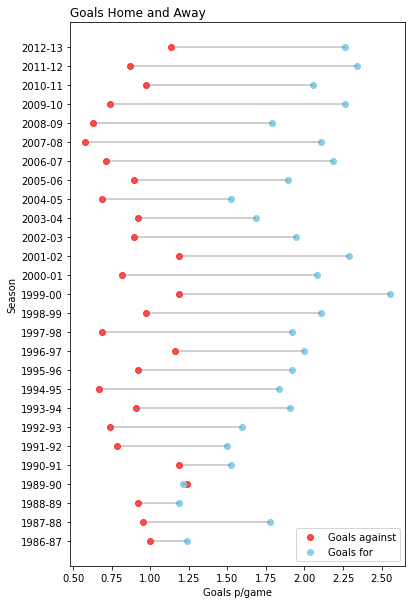

In [159]:
saf_era = team_stats(saf_era, 'Manchester United')
saf_era = saf_era.groupby(['Season'], as_index = False).agg({'Team goals': 'mean', 'Goals against': 'mean'})
season = saf_era['Season']

plt.figure(figsize = (6,10))
plt.hlines(y = season, xmin = saf_era['Goals against'], xmax = saf_era['Team goals'], color='grey', alpha=0.5)
plt.scatter(saf_era['Goals against'], season, color = 'red', alpha = 0.7, label = 'Goals against')
plt.scatter(saf_era['Team goals'], season, color = 'skyblue', alpha = 1, label = 'Goals for')
plt.legend()

plt.yticks(season, saf_era['Season'])
plt.title('Goals Home and Away', loc = 'left')
plt.xlabel('Goals p/game')
plt.ylabel('Season')

In [160]:
if saf_era['Team 1'] == 'Manchester United':
    print(saf_era['Home goals'])
elif saf_era['Team 2'] == 'Manchester United':
    print(saf_era['Away goals'])

KeyError: 'Team 1'